### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [48]:
data = pd.read_csv('data/coupons.csv')

In [49]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [50]:
data.describe(include="all")

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [79]:
duplicate_count = data.duplicated().sum()
duplicate_count

74

In [51]:
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [52]:
data = data.fillna(0)

4. What proportion of the total observations chose to accept the coupon?



In [55]:
data.query('Y == 1')['Y'].count() / len(data)
# 56.8% chose to accept the coupon

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

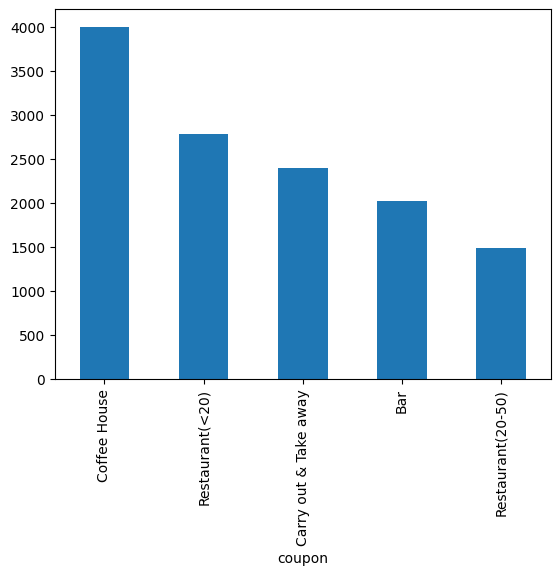

In [32]:
data.coupon.value_counts().plot(kind='bar')

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

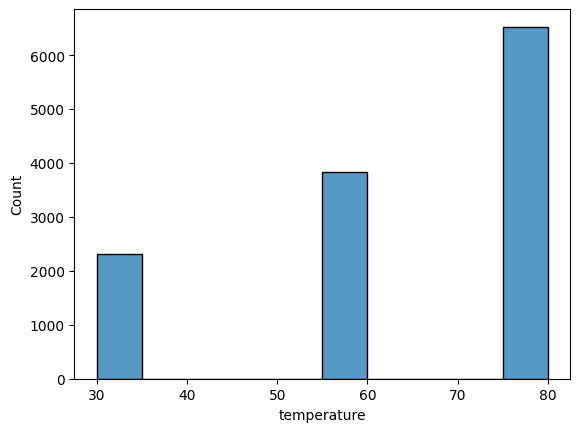

In [37]:
sns.histplot(data['temperature'], bins=10)

In [35]:
# Double checking if the chart is correct
data['temperature'].value_counts()

,count
temperature,
80,6528
55,3840
30,2316


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [43]:
bar = data[data['coupon'] == 'Bar']
bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [57]:
bar.query('Y == 1')['Y'].count() / len(bar)
#41.0% of the bar coupons were accepted

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [59]:
bar['Bar'].value_counts()

,count
Bar,
never,830
less1,570
1~3,397
4~8,150
gt8,49


In [119]:
bar_lte3 = ['never', 'less1', '1~3']
bar_gt3 = ['4~8', 'gt8']

went_to_bar_three_or_less = bar.query('Bar in @bar_lte3')['Y'].mean()
went_to_bar_greater_than_three = bar.query('Bar in @bar_gt3')['Y'].mean()

print(went_to_bar_three_or_less)
print(went_to_bar_greater_than_three)

# While only 37% of the people who went to a bar 3 or fewer times a month accepted the coupon,
# 77% of the people who went to a bar more than 3 times a month accepted the coupon.

0.37061769616026713
0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [67]:
bar['age'].value_counts()

,count
age,
21,417
26,395
31,339
50plus,283
36,209
41,178
46,109
below21,87


In [70]:
bar_gte1 = ['1~3','4~8', 'gt8']
age_gt25 = ['26', '31', '50plus', '36', '41', '46']

In [120]:
acceptance_rate_bar_gt1_and_age_25_plus = bar.query('age in @age_gt25 and Bar in @bar_gte1')['Y'].mean()
acceptrance_rate_all_others = bar.query('age not in @age_gt25 and Bar not in @bar_gte1')['Y'].mean()

print(acceptance_rate_bar_gt1_and_age_25_plus)
print(acceptrance_rate_all_others)

# Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: 69.5%
# Acceptance rate of all others: 39.3%

0.6952380952380952
0.3932926829268293


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [84]:
bar['occupation'].value_counts()
# bar['passanger'].value_counts()

,count
occupation,
Unemployed,301
Student,251
Computer & Mathematical,232
Sales & Related,178
Education&Training&Library,140
Management,119
Office & Administrative Support,105
Arts Design Entertainment Sports & Media,100
Business & Financial,89


In [122]:
went_to_bar_gt1 = ['1~3','4~8', 'gt8']
had_passenger_that_were_not_a_kid = ['Friend(s)','Partner'] # Also removed "Alone"
occupation_farming_fishing_forestry_and_unemployed = ['Farming Fishing & Forestry', 'Unemployed'] # Also removed "Unemployed"

target_acceptance_rate = bar.query('Bar in @went_to_bar_gt1 and passanger in @had_passenger_that_were_not_a_kid and occupation not in @occupation_farming_fishing_forestry_and_unemployed')['Y'].mean()
print(target_acceptance_rate)

compare_group_acceptance_rate = bar.query('not (Bar in @went_to_bar_gt1 and passanger in @had_passenger_that_were_not_a_kid and occupation not in @occupation_farming_fishing_forestry_and_unemployed)')['Y'].mean()
print(compare_group_acceptance_rate)

# Acceptance rate of target users: 70.5%
# Acceptance rate of the rest: 38.2%


0.7058823529411765
0.3827828911748782


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [111]:
bar['maritalStatus'].value_counts()
bar['age'].value_counts()
bar['RestaurantLessThan20'].value_counts()
# bar['income'].value_counts()

,count
RestaurantLessThan20,
1~3,878
4~8,568
less1,325
gt8,186
never,37


In [123]:
went_to_bar_gt1 = ['1~3','4~8', 'gt8']
had_passenger_that_were_not_a_kid = ['Friend(s)','Partner']
widowed = ['Widowed']
age_under_30 = ['21', '26', 'below21']
cheap_restaurants_gt4 = ['4~8', 'gt8']
income_lt50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

acceptrance_rate_cohort_1 = bar.query('Bar in @went_to_bar_gt1 and passanger in @had_passenger_that_were_not_a_kid and maritalStatus not in @widowed')['Y'].mean()
acceptrance_rate_cohort_2 = bar.query('Bar in @went_to_bar_gt1 and age in @age_under_30')['Y'].mean()
acceptrance_rate_cohort_3 = bar.query('RestaurantLessThan20 in @cheap_restaurants_gt4 and income in @income_lt50k')['Y'].mean()

print(acceptrance_rate_cohort_1, acceptrance_rate_cohort_2, acceptrance_rate_cohort_3)

0.717948717948718 0.7217391304347827 0.45348837209302323


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
"Younger users with frequent monthly bar visits are more likely to accept the coupon."

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [125]:
coffee_coupon = data[data['coupon'] == 'Coffee House']
coffee_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0


In [126]:
for col in coffee_coupon.columns:
    print(col)
    print(coffee_coupon[col].value_counts())
    print('\n')

destination
destination
No Urgent Place    2155
Home                928
Work                913
Name: count, dtype: int64


passanger
passanger
Alone        2256
Friend(s)    1228
Partner       305
Kid(s)        207
Name: count, dtype: int64


weather
weather
Sunny    3467
Snowy     303
Rainy     226
Name: count, dtype: int64


temperature
temperature
80    2401
55    1277
30     318
Name: count, dtype: int64


time
time
6PM     1093
7AM      913
10AM     899
2PM      794
10PM     297
Name: count, dtype: int64


coupon
coupon
Coffee House    3996
Name: count, dtype: int64


expiration
expiration
2h    2227
1d    1769
Name: count, dtype: int64


gender
gender
Female    2051
Male      1945
Name: count, dtype: int64


age
age
21         883
26         843
31         623
50plus     545
36         402
41         325
46         220
below21    155
Name: count, dtype: int64


maritalStatus
maritalStatus
Single               1550
Married partner      1541
Unmarried partner     717
Divorced     

In [128]:
coffee_coupon_accepted = data[(data['coupon'] == 'Coffee House') & (data['Y'] == 1)]

In [131]:
for col in coffee_coupon.columns:
    try:
        proportions = coffee_coupon_accepted[col].value_counts() / coffee_coupon[col].value_counts()
        print(proportions)
    except:
        print("Could not calculate proportions for this column")
    print('\n')

destination
Home               0.362069
No Urgent Place    0.580974
Work               0.445783
Name: count, dtype: float64


passanger
Alone        0.437943
Friend(s)    0.596906
Partner      0.570492
Kid(s)       0.483092
Name: count, dtype: float64


weather
Sunny    0.503605
Snowy    0.432343
Rainy    0.522124
Name: count, dtype: float64


temperature
80    0.529779
55    0.455756
30    0.443396
Name: count, dtype: float64


time
10AM    0.640712
10PM    0.424242
2PM     0.547859
6PM     0.412626
7AM     0.445783
Name: count, dtype: float64


coupon
Coffee House    0.499249
Name: count, dtype: float64


expiration
1d    0.583946
2h    0.431971
Name: count, dtype: float64


gender
Female    0.492443
Male      0.506427
Name: count, dtype: float64


age
21         0.524349
26         0.514828
31         0.476726
50plus     0.420183
36         0.467662
41         0.501538
46         0.513636
below21    0.696774
Name: count, dtype: float64


maritalStatus
Single               0.516129
M

In [ ]:
"Users who often go to coffee houses, younger (students), are not going to urgent places, and are moving at an early time of the day are more likely to accept the coupon."